In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('success')

success


In [4]:
train_data = pd.read_csv('./train.csv',header=None) # csv 形式のファイルを　データフレーム形式で読み込み
train_label = pd.read_csv('./trainLabels.csv', header=None) # header= None とすることで最初の行からデータであることを示す
predict_data = pd.read_csv('./test.csv',header=None)

1

In [92]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(train_data, train_label[0].values)
predict_label = rf.predict(predict_data)

In [100]:
rf.oob_score_

0.871

In [132]:
label = pd.DataFrame(predict_label,columns=['Solution'])#.to_csv('./predict_label.csv', names=('Id','Solution'))#, index=None)

In [139]:
Id = pd.DataFrame(np.arange(1,9001),columns=['Id'])
output = pd.concat([Id,label], axis=1)
output
output.to_csv('./predict_label.csv',index=None)

In [138]:
s = pd.Series(np.random.randn(5),index=["a","b","c","d","e"])
s


array([   1,    2,    3, ..., 8998, 8999, 9000])

In [13]:
s+s


a    4.459005
b   -0.833458
c   -4.081763
d    0.695791
e   -0.887613
dtype: float64

In [8]:
d = {'one':pd.Series([1,2,3],index=['a','b','c']), 'two':pd.Series([1,2,3,4], index=['a','b','c','d'])}

In [6]:
df = pd.DataFrame(d)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
one    3 non-null float64
two    4 non-null int64
dtypes: float64(1), int64(1)
memory usage: 96.0+ bytes


In [9]:
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [11]:
df['three'] = df['one']*df['two']


,one,two,three
a,1,1,1
b,2,2,4
c,3,3,9
d,NaN,4,NaN


In [7]:
df.xs('a')

one      1
two      1
three    1
Name: a, dtype: float64

In [8]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 3 columns):
one      3 non-null float64
two      4 non-null int64
three    3 non-null float64
dtypes: float64(2), int64(1)
memory usage: 128.0+ bytes


In [16]:
# df.var()

df['one'][:, np.newaxis]

array([[  1.],
       [  2.],
       [  3.],
       [ nan]])

In [17]:
df.sort_index(by='one',ascending=False)

,one,two,three
c,3,3,9
b,2,2,4
a,1,1,1
d,NaN,4,NaN


In [19]:
from sklearn import datasets, linear_model

In [27]:
regr = linear_model.LinearRegression()
dftest = pd.read_csv('./train.csv',header=None)

In [29]:
a = dftest[0][:, np.newaxis]  #データフレームの配列化
b = dftest[1][:, np.newaxis]

regr.fit(a,b)

1000

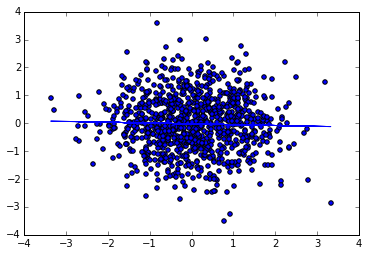

In [78]:
plt.scatter(a,b)
plt.plot(a, regr.predict(a), color='blue')
plt.show()

In [85]:
print('Variance score: %.10f' % regr.score(a,b))

Variance score: 0.0008423035
